# **1. Data Exploration**

## **1.1 LSOA BRES**

In [1]:
import glob
import pandas as pd

In [2]:
file_paths_bres_v1 = glob.glob('Data/BRES/*_V1.csv')

In [3]:
bres_v1_data_frames = {}

for file_path in file_paths_bres_v1:
    year = file_path.rsplit("/", 1)[-1].split("_", 1)[0]
    bres_v1 = pd.read_csv(file_path)             
    bres_v1_data_frames[year] = bres_v1                      

print("Years loaded:", sorted(bres_v1_data_frames.keys()))

Years loaded: ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [4]:
for year, df in bres_v1_data_frames.items():
    n_with_nan = df.isna().any(axis=1).sum()
    print(f"{year}: {n_with_nan} rows with ≥1 NaN")
    
    cleaned = df.dropna()
    bres_v1_data_frames[year] = cleaned
    
    print(f"{year} dtypes:\n{cleaned.dtypes}\n")

2022: 6 rows with ≥1 NaN
2022 dtypes:
2011 super output area - lower layer                                                       object
mnemonic                                                                                   object
2110 : Manufacture of basic pharmaceutical products                                       float64
2120 : Manufacture of pharmaceutical preparations                                         float64
3250 : Manufacture of medical and dental instruments and supplies                         float64
6201 : Computer programming activities                                                    float64
6202 : Computer consultancy activities                                                    float64
6209 : Other information technology and computer service activities                       float64
6311 : Data processing, hosting and related activities                                    float64
6312 : Web portals                                                              

In [5]:
for year, df in bres_v1_data_frames.items():
    numeric_cols = df.select_dtypes(include='number').columns
    df['total'] = df[numeric_cols].sum(axis=1)
    df['share'] = df['total'] / df['total'].sum()
    bres_v1_data_frames[year] = df

/tmp/ipykernel_22715/2329285927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total'] = df[numeric_cols].sum(axis=1)
/tmp/ipykernel_22715/2329285927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['share'] = df['total'] / df['total'].sum()


In [6]:
bres_v1_2015 = bres_v1_data_frames["2015"]
bres_v1_2016 = bres_v1_data_frames["2016"]
bres_v1_2017 = bres_v1_data_frames["2017"]
bres_v1_2018 = bres_v1_data_frames["2018"]
bres_v1_2019 = bres_v1_data_frames["2019"]
bres_v1_2020 = bres_v1_data_frames["2020"]
bres_v1_2021 = bres_v1_data_frames["2021"]
bres_v1_2022 = bres_v1_data_frames["2022"]
bres_v1_2023 = bres_v1_data_frames["2023"]

In [8]:
from IPython.display import display

for year, df in sorted(bres_v1_data_frames.items()):
    print(f"\n===== {year} =====")
    print("Shape:", df.shape)
    print("Dtypes:\n", df.dtypes, "\n")
    print("Head:")
    display(df.head())


===== 2015 =====
Shape: (4835, 20)
Dtypes:
 2011 super output area - lower layer                                                       object
mnemonic                                                                                   object
2110 : Manufacture of basic pharmaceutical products                                       float64
2120 : Manufacture of pharmaceutical preparations                                         float64
3250 : Manufacture of medical and dental instruments and supplies                         float64
6201 : Computer programming activities                                                    float64
6202 : Computer consultancy activities                                                    float64
6209 : Other information technology and computer service activities                       float64
6311 : Data processing, hosting and related activities                                    float64
6312 : Web portals                                                       

,2011 super output area - lower layer,mnemonic,2110 : Manufacture of basic pharmaceutical products,2120 : Manufacture of pharmaceutical preparations,3250 : Manufacture of medical and dental instruments and supplies,6201 : Computer programming activities,6202 : Computer consultancy activities,6209 : Other information technology and computer service activities,"6311 : Data processing, hosting and related activities",6312 : Web portals,2899 : Manufacture of other special-purpose machinery n.e.c.,7112 : Engineering activities and related technical consultancy,7120 : Technical testing and analysis,7211 : Research and experimental development on biotechnology,7219 : Other research and experimental development on natural sciences and engineering,2620 : Manufacture of computers and peripheral equipment,"2651 : Manufacture of instruments and appliances for measuring, testing and navigation","2660 : Manufacture of irradiation, electromedical and electrotherapeutic equipment",total,share
0,Camden 001A,E01000907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Camden 001B,E01000908,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.000038
2,Camden 001C,E01000909,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.000057
3,Camden 001D,E01000912,0.0,0.0,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.000153
4,Camden 001E,E01000913,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.000038



===== 2016 =====
Shape: (4835, 20)
Dtypes:
 2011 super output area - lower layer                                                       object
mnemonic                                                                                   object
2110 : Manufacture of basic pharmaceutical products                                       float64
2120 : Manufacture of pharmaceutical preparations                                         float64
3250 : Manufacture of medical and dental instruments and supplies                         float64
6201 : Computer programming activities                                                    float64
6202 : Computer consultancy activities                                                    float64
6209 : Other information technology and computer service activities                       float64
6311 : Data processing, hosting and related activities                                    float64
6312 : Web portals                                                       

,2011 super output area - lower layer,mnemonic,2110 : Manufacture of basic pharmaceutical products,2120 : Manufacture of pharmaceutical preparations,3250 : Manufacture of medical and dental instruments and supplies,6201 : Computer programming activities,6202 : Computer consultancy activities,6209 : Other information technology and computer service activities,"6311 : Data processing, hosting and related activities",6312 : Web portals,2899 : Manufacture of other special-purpose machinery n.e.c.,7112 : Engineering activities and related technical consultancy,7120 : Technical testing and analysis,7211 : Research and experimental development on biotechnology,7219 : Other research and experimental development on natural sciences and engineering,2620 : Manufacture of computers and peripheral equipment,"2651 : Manufacture of instruments and appliances for measuring, testing and navigation","2660 : Manufacture of irradiation, electromedical and electrotherapeutic equipment",total,share
0,Camden 001A,E01000907,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000016
1,Camden 001B,E01000908,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.000033
2,Camden 001C,E01000909,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.000049
3,Camden 001D,E01000912,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.000099
4,Camden 001E,E01000913,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.000049



===== 2017 =====
Shape: (4835, 20)
Dtypes:
 2011 super output area - lower layer                                                       object
mnemonic                                                                                   object
2110 : Manufacture of basic pharmaceutical products                                       float64
2120 : Manufacture of pharmaceutical preparations                                         float64
3250 : Manufacture of medical and dental instruments and supplies                         float64
6201 : Computer programming activities                                                    float64
6202 : Computer consultancy activities                                                    float64
6209 : Other information technology and computer service activities                       float64
6311 : Data processing, hosting and related activities                                    float64
6312 : Web portals                                                       

,2011 super output area - lower layer,mnemonic,2110 : Manufacture of basic pharmaceutical products,2120 : Manufacture of pharmaceutical preparations,3250 : Manufacture of medical and dental instruments and supplies,6201 : Computer programming activities,6202 : Computer consultancy activities,6209 : Other information technology and computer service activities,"6311 : Data processing, hosting and related activities",6312 : Web portals,2899 : Manufacture of other special-purpose machinery n.e.c.,7112 : Engineering activities and related technical consultancy,7120 : Technical testing and analysis,7211 : Research and experimental development on biotechnology,7219 : Other research and experimental development on natural sciences and engineering,2620 : Manufacture of computers and peripheral equipment,"2651 : Manufacture of instruments and appliances for measuring, testing and navigation","2660 : Manufacture of irradiation, electromedical and electrotherapeutic equipment",total,share
0,Camden 001A,E01000907,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.000035
1,Camden 001B,E01000908,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.000035
2,Camden 001C,E01000909,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000018
3,Camden 001D,E01000912,0.0,0.0,0.0,0.0,5.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.000194
4,Camden 001E,E01000913,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.000035



===== 2018 =====
Shape: (4835, 20)
Dtypes:
 2011 super output area - lower layer                                                       object
mnemonic                                                                                   object
2110 : Manufacture of basic pharmaceutical products                                       float64
2120 : Manufacture of pharmaceutical preparations                                         float64
3250 : Manufacture of medical and dental instruments and supplies                         float64
6201 : Computer programming activities                                                    float64
6202 : Computer consultancy activities                                                    float64
6209 : Other information technology and computer service activities                       float64
6311 : Data processing, hosting and related activities                                    float64
6312 : Web portals                                                       

,2011 super output area - lower layer,mnemonic,2110 : Manufacture of basic pharmaceutical products,2120 : Manufacture of pharmaceutical preparations,3250 : Manufacture of medical and dental instruments and supplies,6201 : Computer programming activities,6202 : Computer consultancy activities,6209 : Other information technology and computer service activities,"6311 : Data processing, hosting and related activities",6312 : Web portals,2899 : Manufacture of other special-purpose machinery n.e.c.,7112 : Engineering activities and related technical consultancy,7120 : Technical testing and analysis,7211 : Research and experimental development on biotechnology,7219 : Other research and experimental development on natural sciences and engineering,2620 : Manufacture of computers and peripheral equipment,"2651 : Manufacture of instruments and appliances for measuring, testing and navigation","2660 : Manufacture of irradiation, electromedical and electrotherapeutic equipment",total,share
0,Camden 001A,E01000907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Camden 001B,E01000908,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000017
2,Camden 001C,E01000909,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000017
3,Camden 001D,E01000912,0.0,0.0,0.0,20.0,5.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.000252
4,Camden 001E,E01000913,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.000050



===== 2019 =====
Shape: (4835, 20)
Dtypes:
 2011 super output area - lower layer                                                       object
mnemonic                                                                                   object
2110 : Manufacture of basic pharmaceutical products                                       float64
2120 : Manufacture of pharmaceutical preparations                                         float64
3250 : Manufacture of medical and dental instruments and supplies                         float64
6201 : Computer programming activities                                                    float64
6202 : Computer consultancy activities                                                    float64
6209 : Other information technology and computer service activities                       float64
6311 : Data processing, hosting and related activities                                    float64
6312 : Web portals                                                       

,2011 super output area - lower layer,mnemonic,2110 : Manufacture of basic pharmaceutical products,2120 : Manufacture of pharmaceutical preparations,3250 : Manufacture of medical and dental instruments and supplies,6201 : Computer programming activities,6202 : Computer consultancy activities,6209 : Other information technology and computer service activities,"6311 : Data processing, hosting and related activities",6312 : Web portals,2899 : Manufacture of other special-purpose machinery n.e.c.,7112 : Engineering activities and related technical consultancy,7120 : Technical testing and analysis,7211 : Research and experimental development on biotechnology,7219 : Other research and experimental development on natural sciences and engineering,2620 : Manufacture of computers and peripheral equipment,"2651 : Manufacture of instruments and appliances for measuring, testing and navigation","2660 : Manufacture of irradiation, electromedical and electrotherapeutic equipment",total,share
0,Camden 001A,E01000907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Camden 001B,E01000908,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.000045
2,Camden 001C,E01000909,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000015
3,Camden 001D,E01000912,0.0,0.0,0.0,20.0,10.0,50.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.000268
4,Camden 001E,E01000913,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.000060



===== 2020 =====
Shape: (4835, 20)
Dtypes:
 2011 super output area - lower layer                                                       object
mnemonic                                                                                   object
2110 : Manufacture of basic pharmaceutical products                                       float64
2120 : Manufacture of pharmaceutical preparations                                         float64
3250 : Manufacture of medical and dental instruments and supplies                         float64
6201 : Computer programming activities                                                    float64
6202 : Computer consultancy activities                                                    float64
6209 : Other information technology and computer service activities                       float64
6311 : Data processing, hosting and related activities                                    float64
6312 : Web portals                                                       

,2011 super output area - lower layer,mnemonic,2110 : Manufacture of basic pharmaceutical products,2120 : Manufacture of pharmaceutical preparations,3250 : Manufacture of medical and dental instruments and supplies,6201 : Computer programming activities,6202 : Computer consultancy activities,6209 : Other information technology and computer service activities,"6311 : Data processing, hosting and related activities",6312 : Web portals,2899 : Manufacture of other special-purpose machinery n.e.c.,7112 : Engineering activities and related technical consultancy,7120 : Technical testing and analysis,7211 : Research and experimental development on biotechnology,7219 : Other research and experimental development on natural sciences and engineering,2620 : Manufacture of computers and peripheral equipment,"2651 : Manufacture of instruments and appliances for measuring, testing and navigation","2660 : Manufacture of irradiation, electromedical and electrotherapeutic equipment",total,share
0,Camden 001A,E01000907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.000033
1,Camden 001B,E01000908,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.000050
2,Camden 001C,E01000909,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000017
3,Camden 001D,E01000912,0.0,0.0,0.0,20.0,5.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.000215
4,Camden 001E,E01000913,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.000050



===== 2021 =====
Shape: (4835, 20)
Dtypes:
 2011 super output area - lower layer                                                       object
mnemonic                                                                                   object
2110 : Manufacture of basic pharmaceutical products                                       float64
2120 : Manufacture of pharmaceutical preparations                                         float64
3250 : Manufacture of medical and dental instruments and supplies                         float64
6201 : Computer programming activities                                                    float64
6202 : Computer consultancy activities                                                    float64
6209 : Other information technology and computer service activities                       float64
6311 : Data processing, hosting and related activities                                    float64
6312 : Web portals                                                       

,2011 super output area - lower layer,mnemonic,2110 : Manufacture of basic pharmaceutical products,2120 : Manufacture of pharmaceutical preparations,3250 : Manufacture of medical and dental instruments and supplies,6201 : Computer programming activities,6202 : Computer consultancy activities,6209 : Other information technology and computer service activities,"6311 : Data processing, hosting and related activities",6312 : Web portals,2899 : Manufacture of other special-purpose machinery n.e.c.,7112 : Engineering activities and related technical consultancy,7120 : Technical testing and analysis,7211 : Research and experimental development on biotechnology,7219 : Other research and experimental development on natural sciences and engineering,2620 : Manufacture of computers and peripheral equipment,"2651 : Manufacture of instruments and appliances for measuring, testing and navigation","2660 : Manufacture of irradiation, electromedical and electrotherapeutic equipment",total,share
0,Camden 001A,E01000907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.000032
1,Camden 001B,E01000908,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,25.0,0.000079
2,Camden 001C,E01000909,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000016
3,Camden 001D,E01000912,0.0,0.0,0.0,20.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,40.0,0.000126
4,Camden 001E,E01000913,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.000032



===== 2022 =====
Shape: (4835, 20)
Dtypes:
 2011 super output area - lower layer                                                       object
mnemonic                                                                                   object
2110 : Manufacture of basic pharmaceutical products                                       float64
2120 : Manufacture of pharmaceutical preparations                                         float64
3250 : Manufacture of medical and dental instruments and supplies                         float64
6201 : Computer programming activities                                                    float64
6202 : Computer consultancy activities                                                    float64
6209 : Other information technology and computer service activities                       float64
6311 : Data processing, hosting and related activities                                    float64
6312 : Web portals                                                       

,2011 super output area - lower layer,mnemonic,2110 : Manufacture of basic pharmaceutical products,2120 : Manufacture of pharmaceutical preparations,3250 : Manufacture of medical and dental instruments and supplies,6201 : Computer programming activities,6202 : Computer consultancy activities,6209 : Other information technology and computer service activities,"6311 : Data processing, hosting and related activities",6312 : Web portals,2899 : Manufacture of other special-purpose machinery n.e.c.,7112 : Engineering activities and related technical consultancy,7120 : Technical testing and analysis,7211 : Research and experimental development on biotechnology,7219 : Other research and experimental development on natural sciences and engineering,2620 : Manufacture of computers and peripheral equipment,"2651 : Manufacture of instruments and appliances for measuring, testing and navigation","2660 : Manufacture of irradiation, electromedical and electrotherapeutic equipment",total,share
0,Camden 001A,E01000907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.000026
1,Camden 001B,E01000908,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,40.0,0.000102
2,Camden 001C,E01000909,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000013
3,Camden 001D,E01000912,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,80.0,0.000205
4,Camden 001E,E01000913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000013



===== 2023 =====
Shape: (4835, 20)
Dtypes:
 2011 super output area - lower layer                                                       object
mnemonic                                                                                   object
2110 : Manufacture of basic pharmaceutical products                                       float64
2120 : Manufacture of pharmaceutical preparations                                         float64
3250 : Manufacture of medical and dental instruments and supplies                         float64
6201 : Computer programming activities                                                    float64
6202 : Computer consultancy activities                                                    float64
6209 : Other information technology and computer service activities                       float64
6311 : Data processing, hosting and related activities                                    float64
6312 : Web portals                                                       

,2011 super output area - lower layer,mnemonic,2110 : Manufacture of basic pharmaceutical products,2120 : Manufacture of pharmaceutical preparations,3250 : Manufacture of medical and dental instruments and supplies,6201 : Computer programming activities,6202 : Computer consultancy activities,6209 : Other information technology and computer service activities,"6311 : Data processing, hosting and related activities",6312 : Web portals,2899 : Manufacture of other special-purpose machinery n.e.c.,7112 : Engineering activities and related technical consultancy,7120 : Technical testing and analysis,7211 : Research and experimental development on biotechnology,7219 : Other research and experimental development on natural sciences and engineering,2620 : Manufacture of computers and peripheral equipment,"2651 : Manufacture of instruments and appliances for measuring, testing and navigation","2660 : Manufacture of irradiation, electromedical and electrotherapeutic equipment",total,share
0,Camden 001A,E01000907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.000025
1,Camden 001B,E01000908,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.000050
2,Camden 001C,E01000909,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000013
3,Camden 001D,E01000912,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,70.0,0.000176
4,Camden 001E,E01000913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## **1.2 LSOA Boundaries**

In [11]:
import geopandas as gpd

lsoa_path = 'Data/GIS/LSOA/LSOA_2011_London_gen_MHW.shp'
lsoa = gpd.read_file(lsoa_path)
lsoa = lsoa.to_crs(epsg=27700)

print("New CRS:", lsoa.crs)

New CRS: EPSG:27700


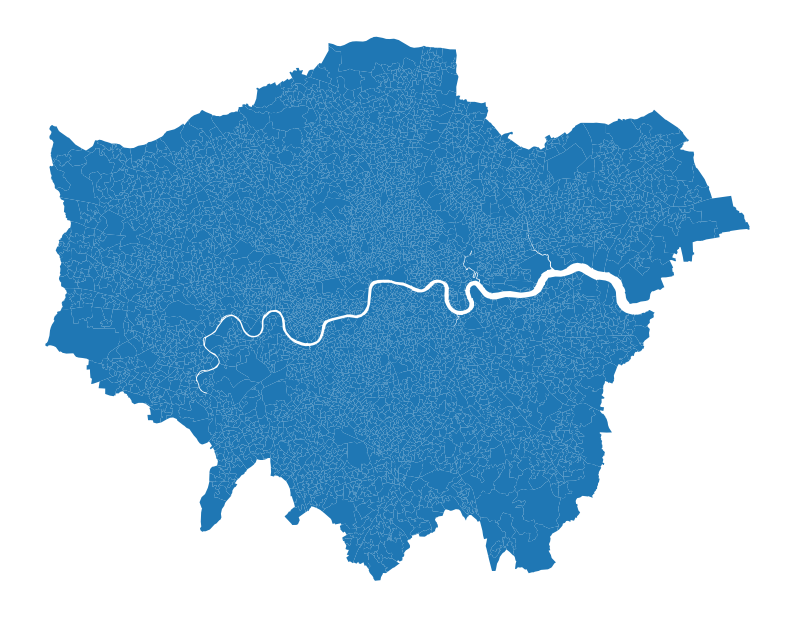

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
lsoa.plot(ax=ax)
ax.set_axis_off()
plt.show()